In [1]:
from parflowio.pyParflowio import PFData
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os, glob, sys

In [16]:
def get_mask():
    usfs_pfb = PFData('Domain_Blank_Mask_clip.pfb')
    usfs_pfb.loadHeader();
    usfs_pfb.loadData();
    usfs_arr = usfs_pfb.copyDataArray().squeeze()
    usfs = xr.DataArray(usfs_arr,dims=['y','x'])
    usfs = usfs.where(usfs==1,0).where(usfs<0,1)
    usfs['x'] = np.arange(24) + 4
    usfs['y'] = np.arange(64) + 12
    mask = usfs.where(usfs==1,1)
    usfs.close();
    return usfs

In [3]:
def get_wrf(wrf_file):
    wrf_pfb = PFData(wrf_file)
    wrf_pfb.loadHeader();
    wrf_pfb.loadData();
    wrf_pfb.close();
    return wrf_pfb

In [4]:
def clip_wrf(wrf,mask):
    wrf_arr = wrf.copyDataArray().squeeze()
    wrf = xr.DataArray(wrf_arr,dims=['t','y','x'])
    wrf['x'] = np.arange(64)
    wrf['y'] = np.arange(128)
    wrf_clip = wrf.where(mask==1,drop=True).values
    return wrf_clip

In [5]:
def subset_wrf(wrf_file,outdir='usfs_wrf/'):
    mask = get_mask()
    wrf = get_wrf(wrf_file)
    clip = clip_wrf(wrf,mask)
    wrf.setDataArray(clip)
    wrf.writeFile(outdir + os.path.basename(wrf_file));
    wrf.close();
    print(os.path.basename(wrf_file))

In [6]:
#wrf_source = 'wrf_forcings_renamed/'
#wrf_files = sorted(glob.glob(wrf_source + '*'))
#[subset_wrf(f) for f in wrf_files]

In [7]:
wrf_source = 'usfs_wrf/'
wrf_files = sorted(glob.glob(wrf_source + '*'))

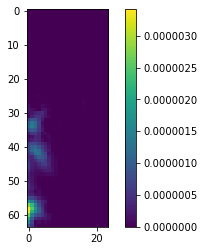

In [13]:
wrf_arr = get_wrf(wrf_files[100]).copyDataArray().squeeze()
plt.imshow(wrf_arr[0])
plt.colorbar();

In [17]:
mask = get_mask()

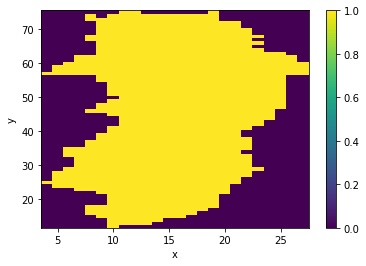

In [19]:
mask.plot()